In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import numpy as np
sns.set(color_codes=True)
%matplotlib inline

**Import all the given datasets and explore the shape and size of each.

In [128]:
df1= pd.read_csv(r'D:\ace 2nd assignment\ace case study 2.2\Bank_Data1.csv')

In [88]:
df1.shape#rows,columns

(5000, 8)

In [7]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [130]:
df2= pd.read_csv(r'D:\ace 2nd assignment\ace case study 2.2\Bank_Data2.csv')

In [90]:
df2.shape#rows,columns

(5000, 7)

In [15]:
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

**Import and warehouse data:**
*   Import all the given datasets and explore the shape and size of each.
*   Merge all datasets on to one and explore final shape and size.

**Merge all datasets on to one and explore final shape and size

In [131]:
# Merge DataFrames on the common index "ID"
merged_df = df1.merge(df2, on='ID', how='outer')  # 'outer' keeps all rows

# Print the merged DataFrame
print(merged_df)

        ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0        1   25              1            49    91107            4   
1        2   45             19            34    90089            3   
2        3   39             15            11    94720            1   
3        4   35              9           100    94112            1   
4        5   35              8            45    91330            4   
...    ...  ...            ...           ...      ...          ...   
4995  4996   29              3            40    92697            1   
4996  4997   30              4            15    92037            4   
4997  4998   63             39            24    93023            2   
4998  4999   65             40            49    90034            3   
4999  5000   28              4            83    92612            3   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                     1.6      1         0         1                    0   
1    

In [92]:
merged_df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

**Data cleansing:**
* Explore and if required correct the datatypes of each attribute
* Explore for null values in the attributes and if required drop or impute values.

**Explore and if required correct the datatypes of each attribute

In [17]:
merged_df

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
4996,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,0.0,0.0,1.0,0.0,0.0
4997,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4998,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0


In [93]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [94]:
merged_df.shape

(5000, 14)

In [19]:
merged_df.isnull()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,False,False,False,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,True,True,True,True,True,True,True,False,False,False,False,False,False
4996,False,True,True,True,True,True,True,True,False,False,False,False,False,False
4997,False,True,True,True,True,True,True,True,False,False,False,False,False,False
4998,False,True,True,True,True,True,True,True,False,False,False,False,False,False


In [39]:
merged_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [132]:
merged_df.isna().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [95]:
 merged_df=merged_df.apply ( lambda x:x.fillna(x.mean()) \
                                                 if x.dtype =='float' else \
                                                 x.fillna (x.value_counts().index[0]))

In [96]:
 merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [97]:
merged_df.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [98]:
 merged_df.shape

(5000, 14)

**Data analysis & visualisation:**
* Perform detailed statistical analysis on the data.
* Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

**Perform detailed statistical analysis on the data

In [ ]:
#import necessary libraries

In [ ]:
# Load and Explore Data tail ,head,info,shap

In [ ]:
#descriptive statistics- describe,#df['column'].value_counts()to get frequency counts.

In [99]:
merged_df.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096386
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294558
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [100]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [ ]:
merged_df.shape #to know dimension

In [ ]:
merged_df.head() ##to know dimension

In [ ]:
merged_df.tail() #to know dimension

In [ ]:
merged_df.info() #to get information about data types, missing values, etc.

**Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

**detailed univariate

**common plot of univariate 1 hist plot 2 barplot 3 box plot 4 violen plot 5.distribution plot 6.pie plot 7 kde plot

**univariate statistics analysis a)mean b)median c)mode d)range e)variance f)sd

**1 hist plot

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'CustomerSince'}>,
        <Axes: title={'center': 'HighestSpend'}>],
       [<Axes: title={'center': 'ZipCode'}>,
        <Axes: title={'center': 'HiddenScore'}>,
        <Axes: title={'center': 'MonthlyAverageSpend'}>,
        <Axes: title={'center': 'Level'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Security'}>,
        <Axes: title={'center': 'FixedDepositAccount'}>,
        <Axes: title={'center': 'InternetBanking'}>],
       [<Axes: title={'center': 'CreditCard'}>,
        <Axes: title={'center': 'LoanOnCard'}>, <Axes: >, <Axes: >]],
      dtype=object)

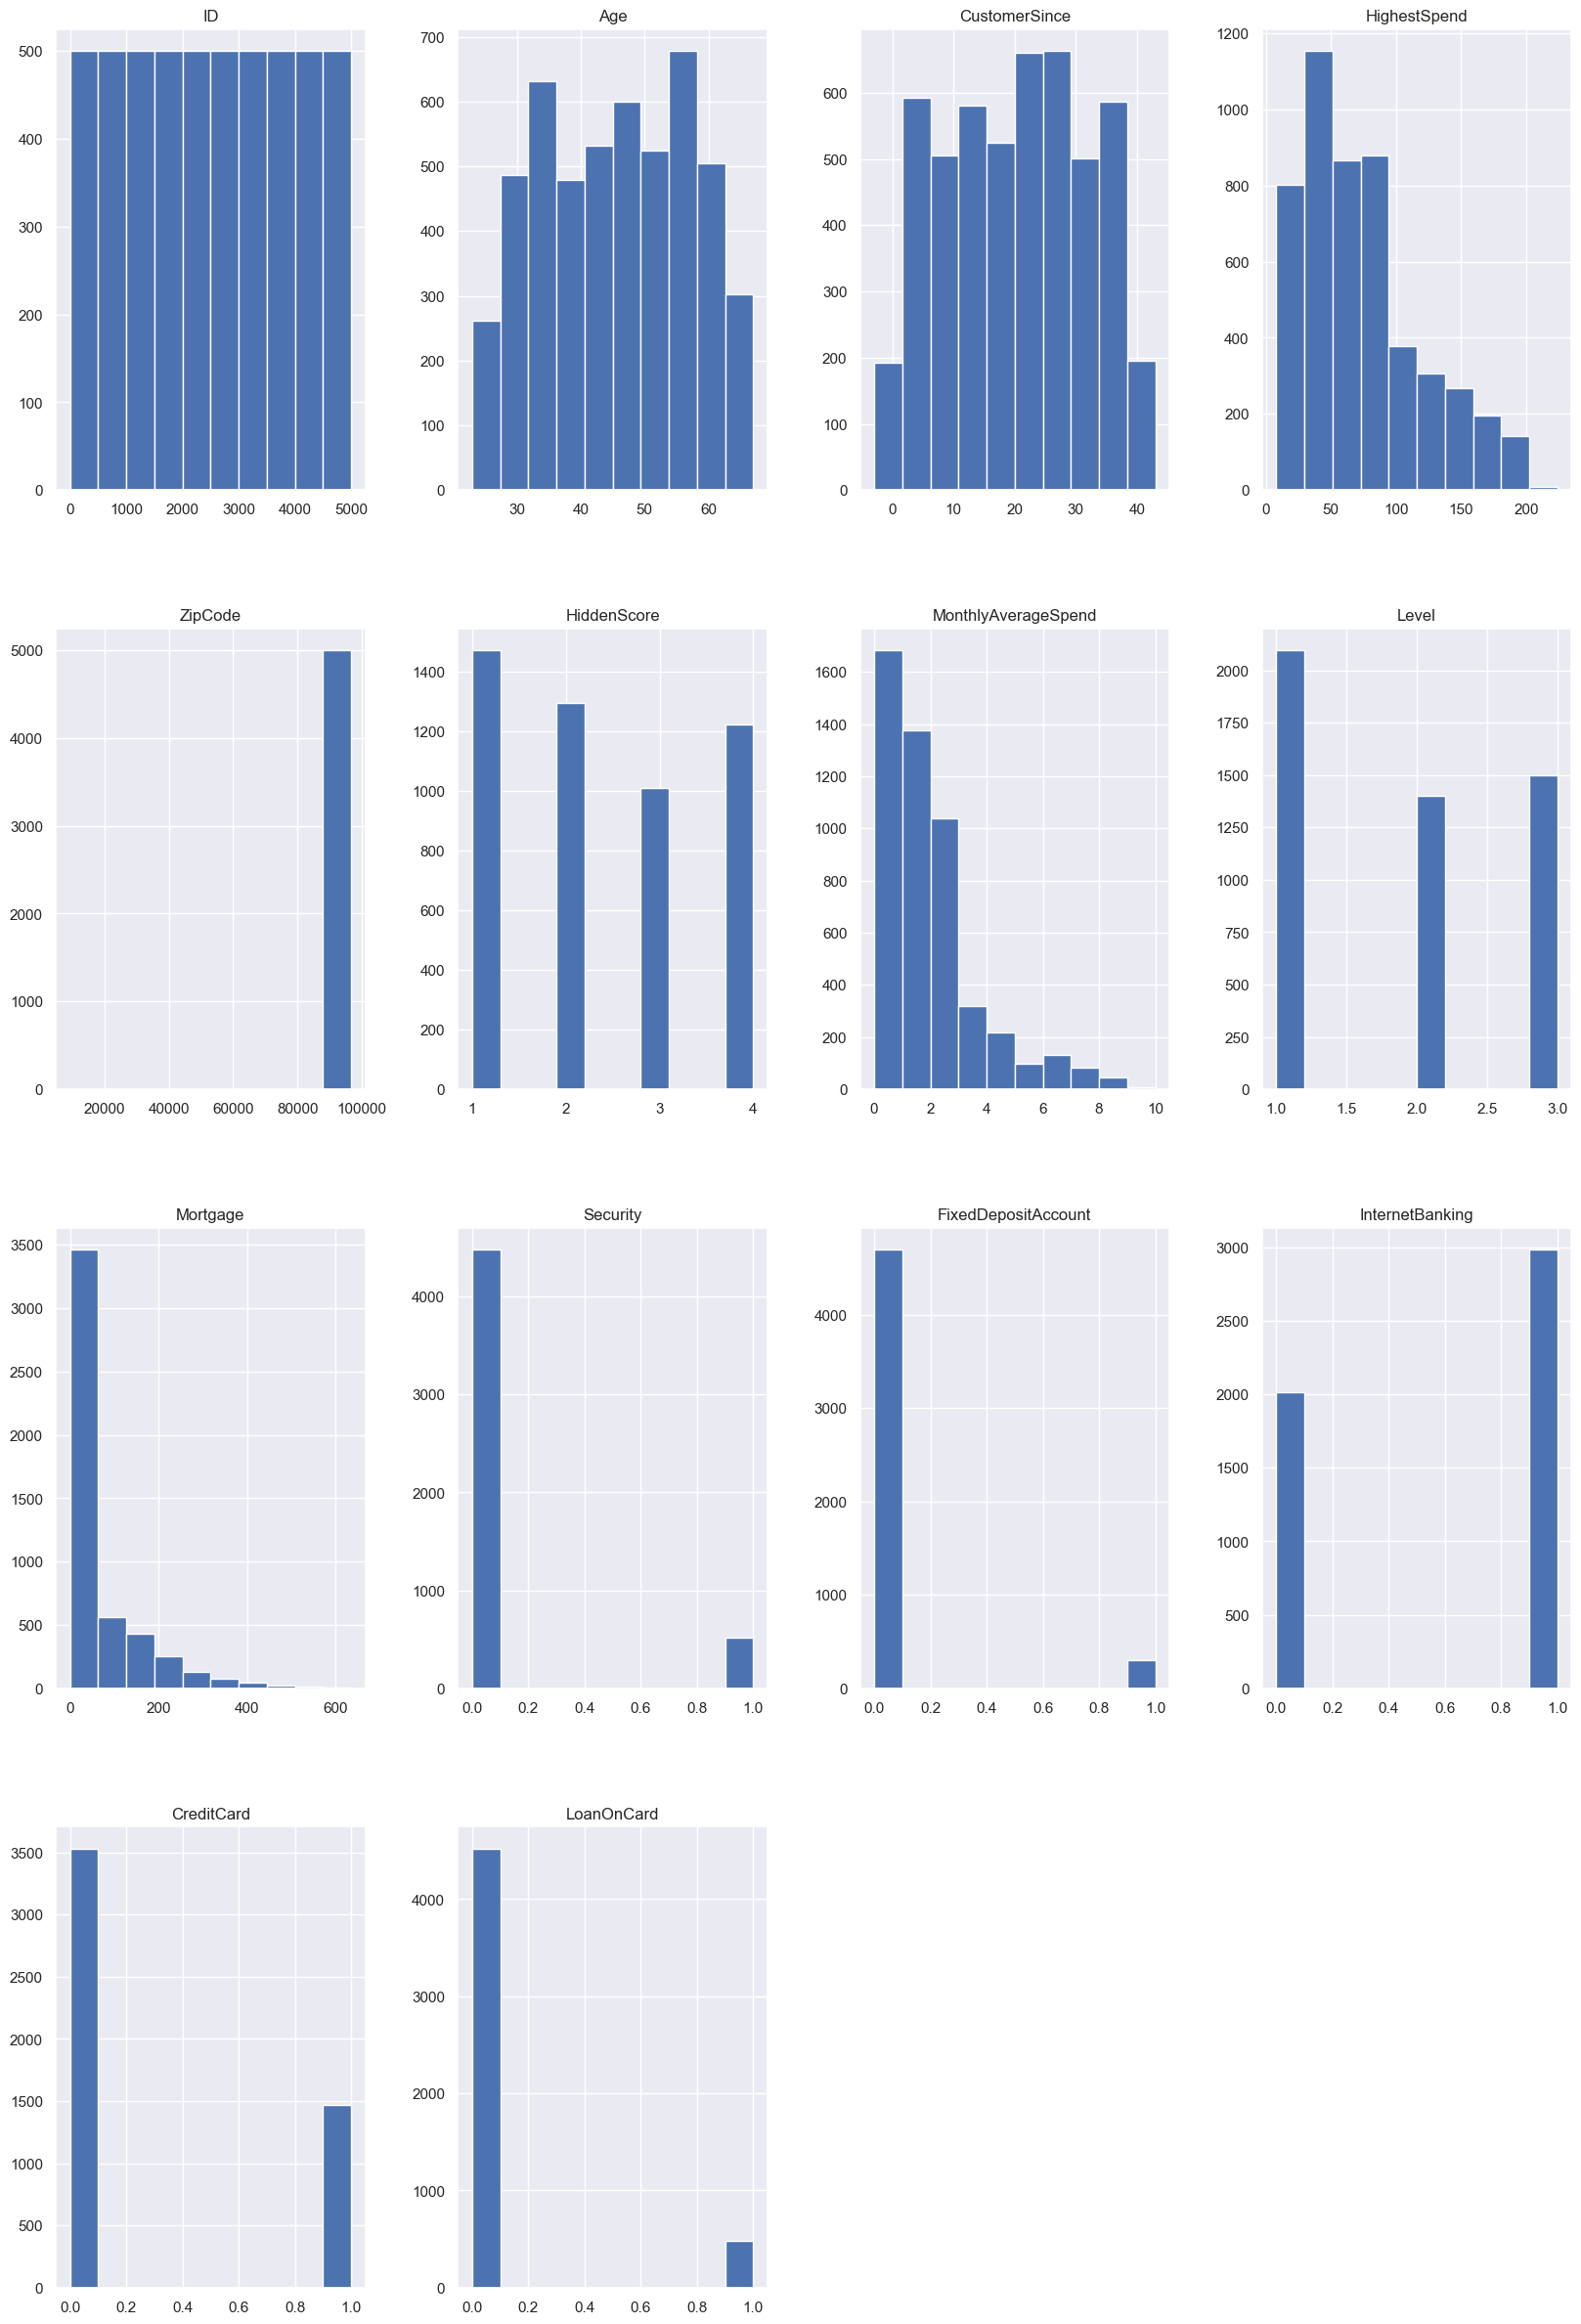

In [101]:
merged_df.hist(figsize=(20,30))

histplot captures visual of grouping and data grouping

**2 barplot

In [51]:
merged_df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [ ]:
fig, ax = plt.subplots(9,1)

fig.set_figheight(15)
fig.set_figwidth(24)

sns.barplot(x='ID',y='Age', data=merged_df, ax=ax[0])
sns.barplot(x='ID',y='CustomerSince', data=merged_df, ax=ax[1])
sns.barplot(x='ID',y='HighestSpend', data=merged_df, ax=ax[2])
sns.barplot(x='ID',y='ZipCode', data=merged_df, ax=ax[3])
sns.barplot(x='ID',y='HiddenScore', data=merged_df, ax=ax[4])
sns.barplot(x='ID',y='MonthlyAverageSpend', data=merged_df, ax=ax[5])
sns.barplot(x='ID',y='Level', data=merged_df, ax=ax[6])
sns.barplot(x='ID',y='Mortgage', data=merged_df, ax=ax[7])
sns.barplot(x='ID',y='FixedDepositAccount', data=merged_df, ax=ax[8])



plt.show()

**3boxplot

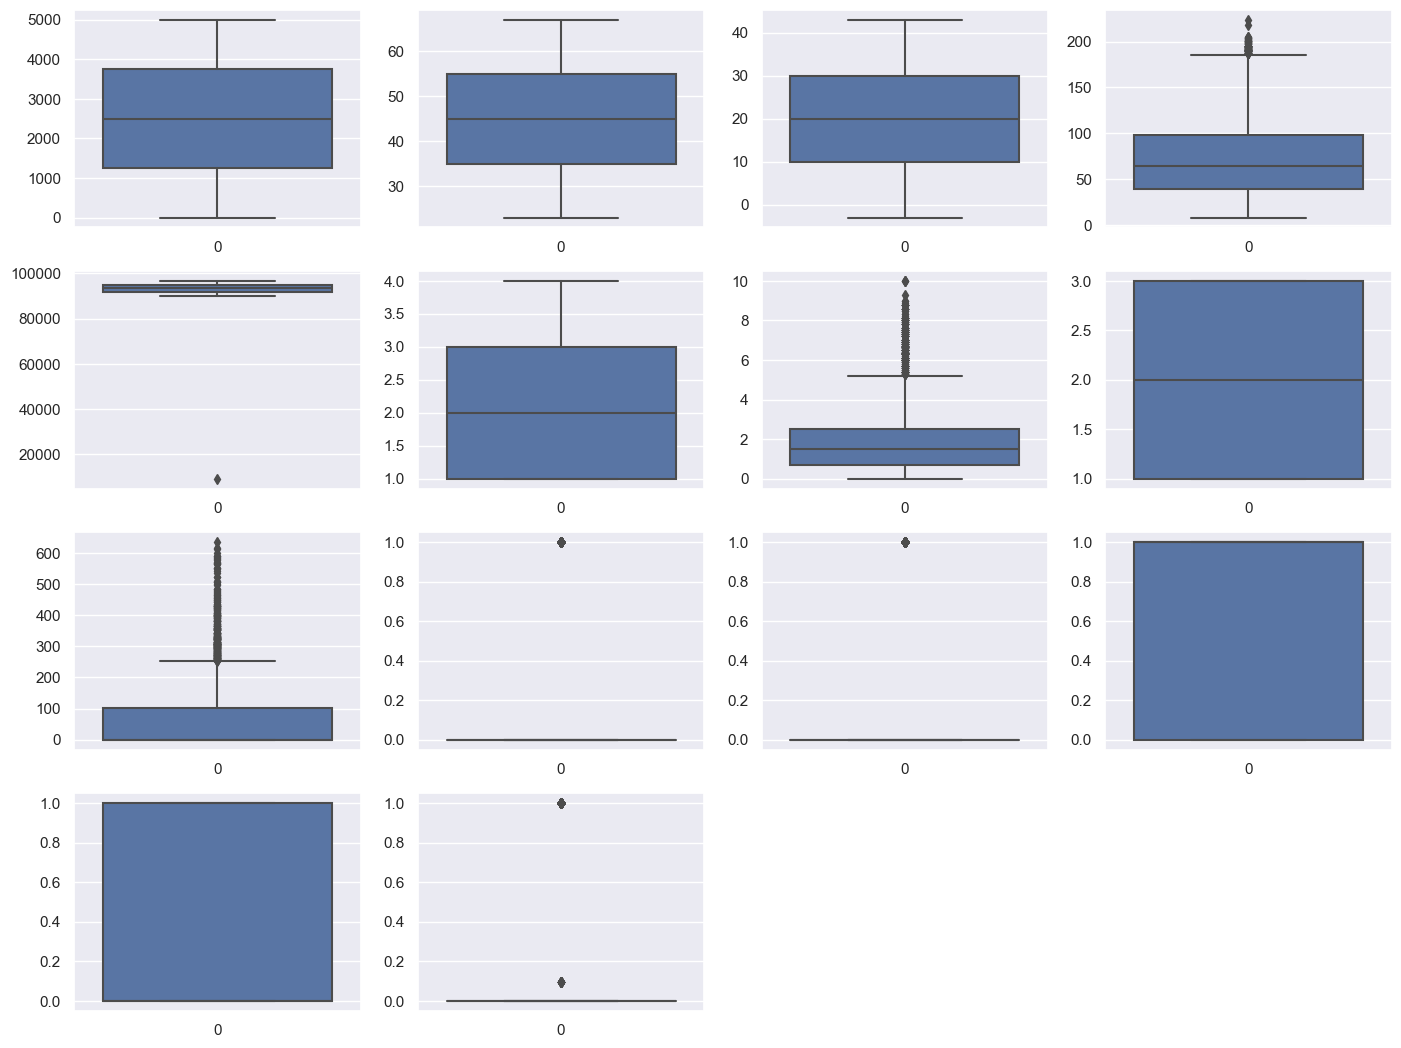

In [64]:
numericColumns =merged_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(17, 13))
index = 1
for i in numericColumns:
 plt.subplot(4, 4, index)
 sns.boxplot(merged_df[i])
 index += 1

box plot identifies outliers

**4)violen plot

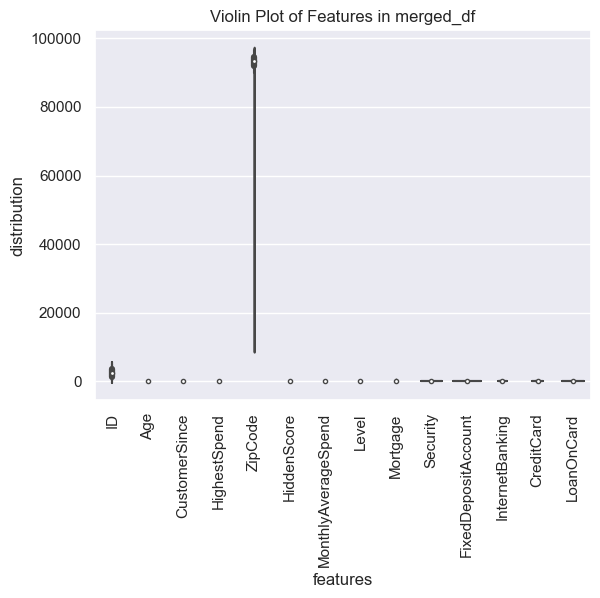

In [102]:
# Create the violin plot
sns.violinplot(data=merged_df)
plt.xlabel("features")  # Set x-axis label
plt.ylabel("distribution")  # Set y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability (optional)
plt.title("Violin Plot of Features in merged_df")  # Set plot title (optional)
plt.show()


violen plot describes data distribution,helpful in IQR,OUTLIERS DETECTION WITH DISTRIBUTION

**5.distribution plot

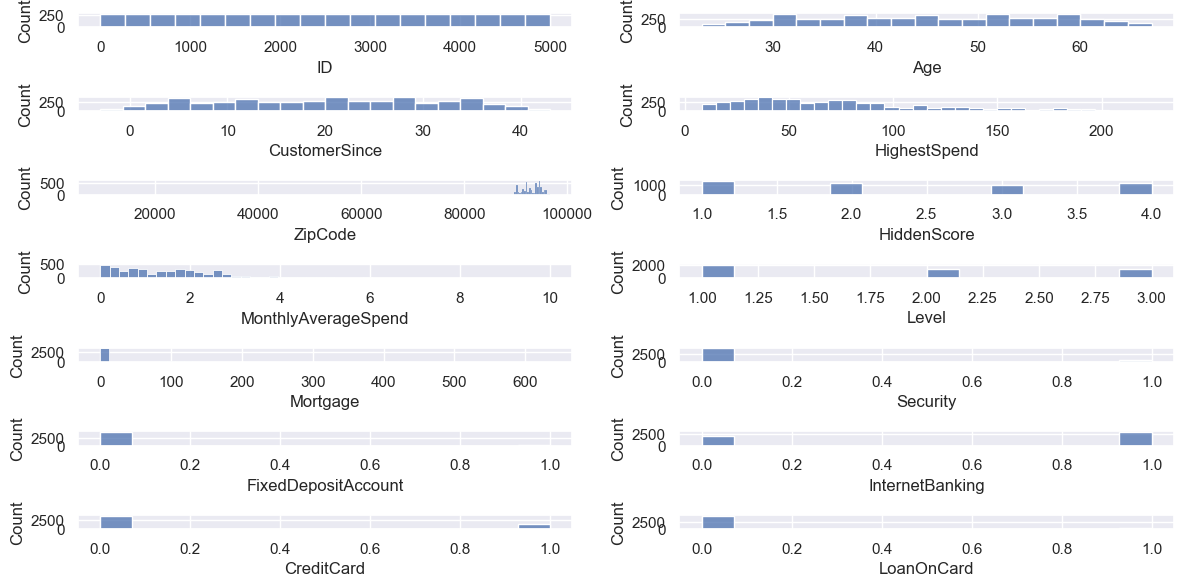

In [124]:
# Create a figure for subplots (optional for multiple plots)
fig, axes = plt.subplots(nrows=(merged_df.shape[1] // 2) + (merged_df.shape[1] % 2), ncols=2, figsize=(12, 6))  # Adjust figsize as needed

# Loop through features and create plots
feature_count = 0
for col in merged_df.columns:
    if col != 'Class':  # Exclude 'Class' if it's categorical
        sns.histplot(data=merged_df, x=col, ax=axes.flat[feature_count])  # Histogram
        # sns.kdeplot(data=df3, x=col, ax=axes.flat[feature_count])  # Kernel density plot (optional)
        #axes.flat[feature_count].set_title(col)
        feature_count += 1

# Adjust layout (optional)
plt.tight_layout()

# Show plot
plt.show()

**6.pie plot

In [133]:
merged_df1=merged_df.copy()

In [134]:
def prepareAgeGroup():
 for index, row in merged_df1.iterrows():
  if row['Age'] <= 40:
   merged_df1.loc[index,'age_group']='Below 40'
  elif row['Age'] > 40 and row['Age'] <= 60:
   merged_df1.loc[index,'age_group']='40 - 60'
  else:
   merged_df1.loc[index,'age_group']='Above 60'

In [135]:
prepareAgeGroup()

Text(0.5, 1.0, 'Distribution of age group in merged_df1')

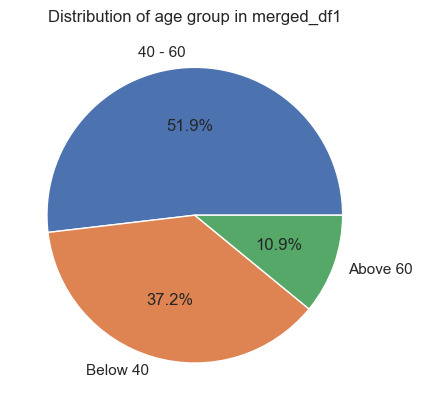

In [136]:
age_group_counts = merged_df1['age_group'].value_counts()

# Create the pie chart
plt.pie(age_group_counts, labels=age_group_counts.index, autopct="%1.1f%%")
plt.title("Distribution of age group in merged_df1")

PIE CHART PEREFERABLE FOR CATEGORICAL DISTRIBUTION  

In [137]:
merged_df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [138]:
merged_df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard',
       'age_group'],
      dtype='object')

**7.kde

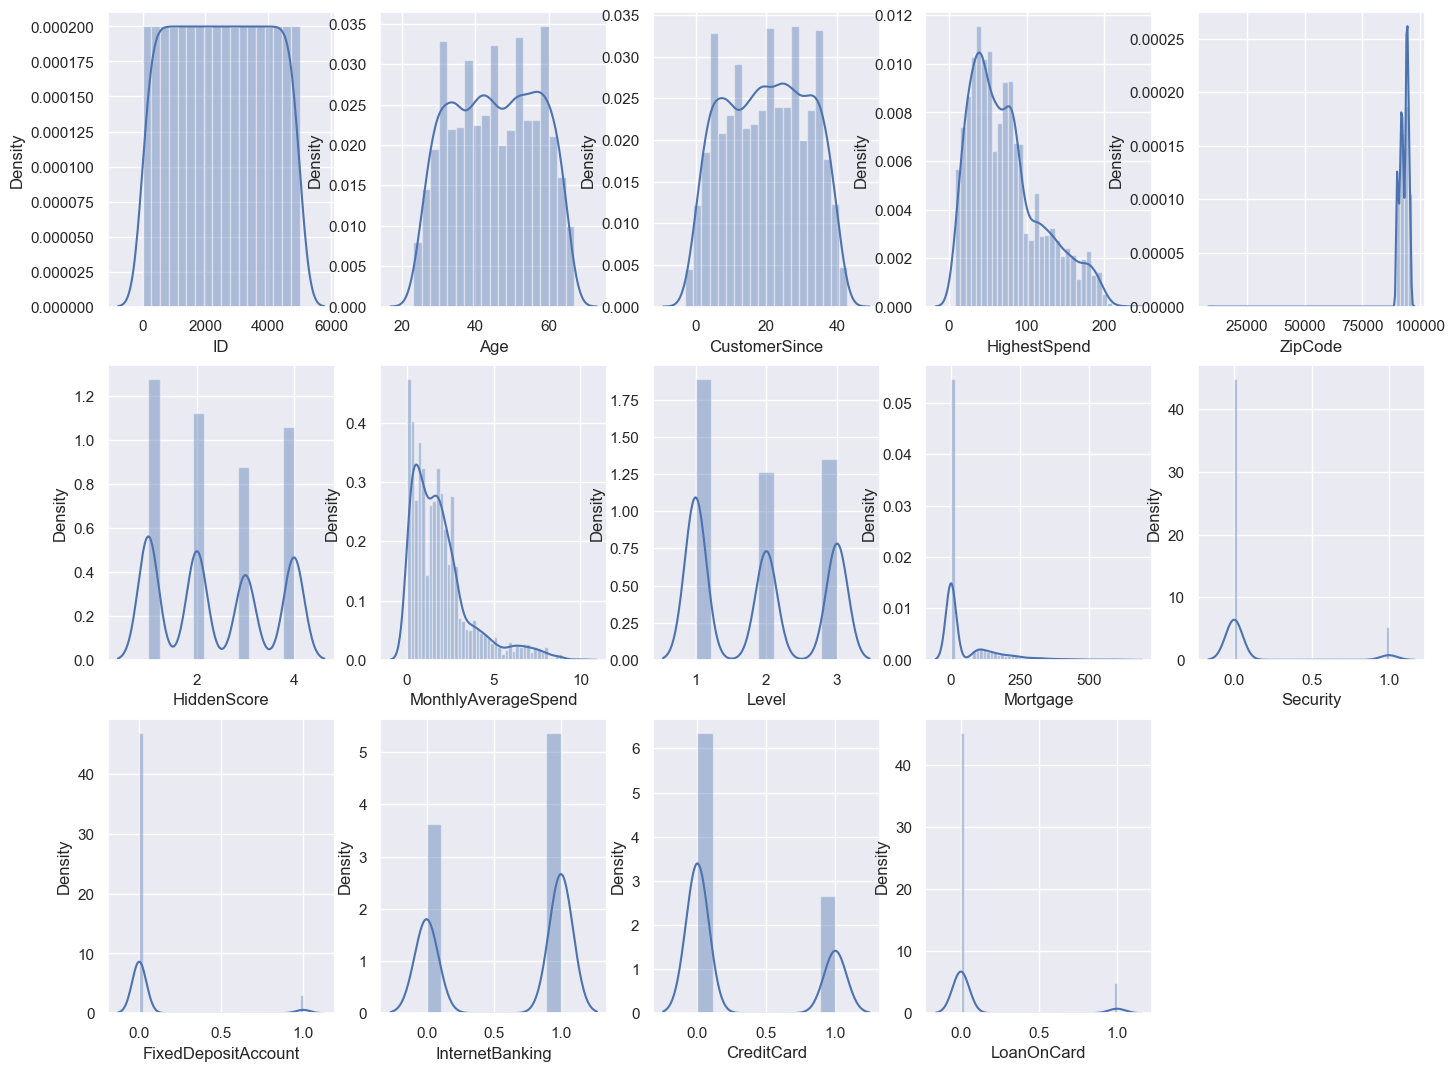

In [143]:
merged_df_Columns = merged_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(17, 13))
index = 1
for i in merged_df_Columns:
    plt.subplot(3, 5, index)
    sns.distplot(merged_df[i], kde=True)
    index += 1

In [ ]:
DIST PLOT= HISTO+KDE..A GOOD WAY TO IDENTIFY GROUPING

**detailed bivariate and multivariate analysis

common plot of multivariate 1)scatter 2)heat 3)pair 4)line 5)relation 6)joint 7)point 8)bubble

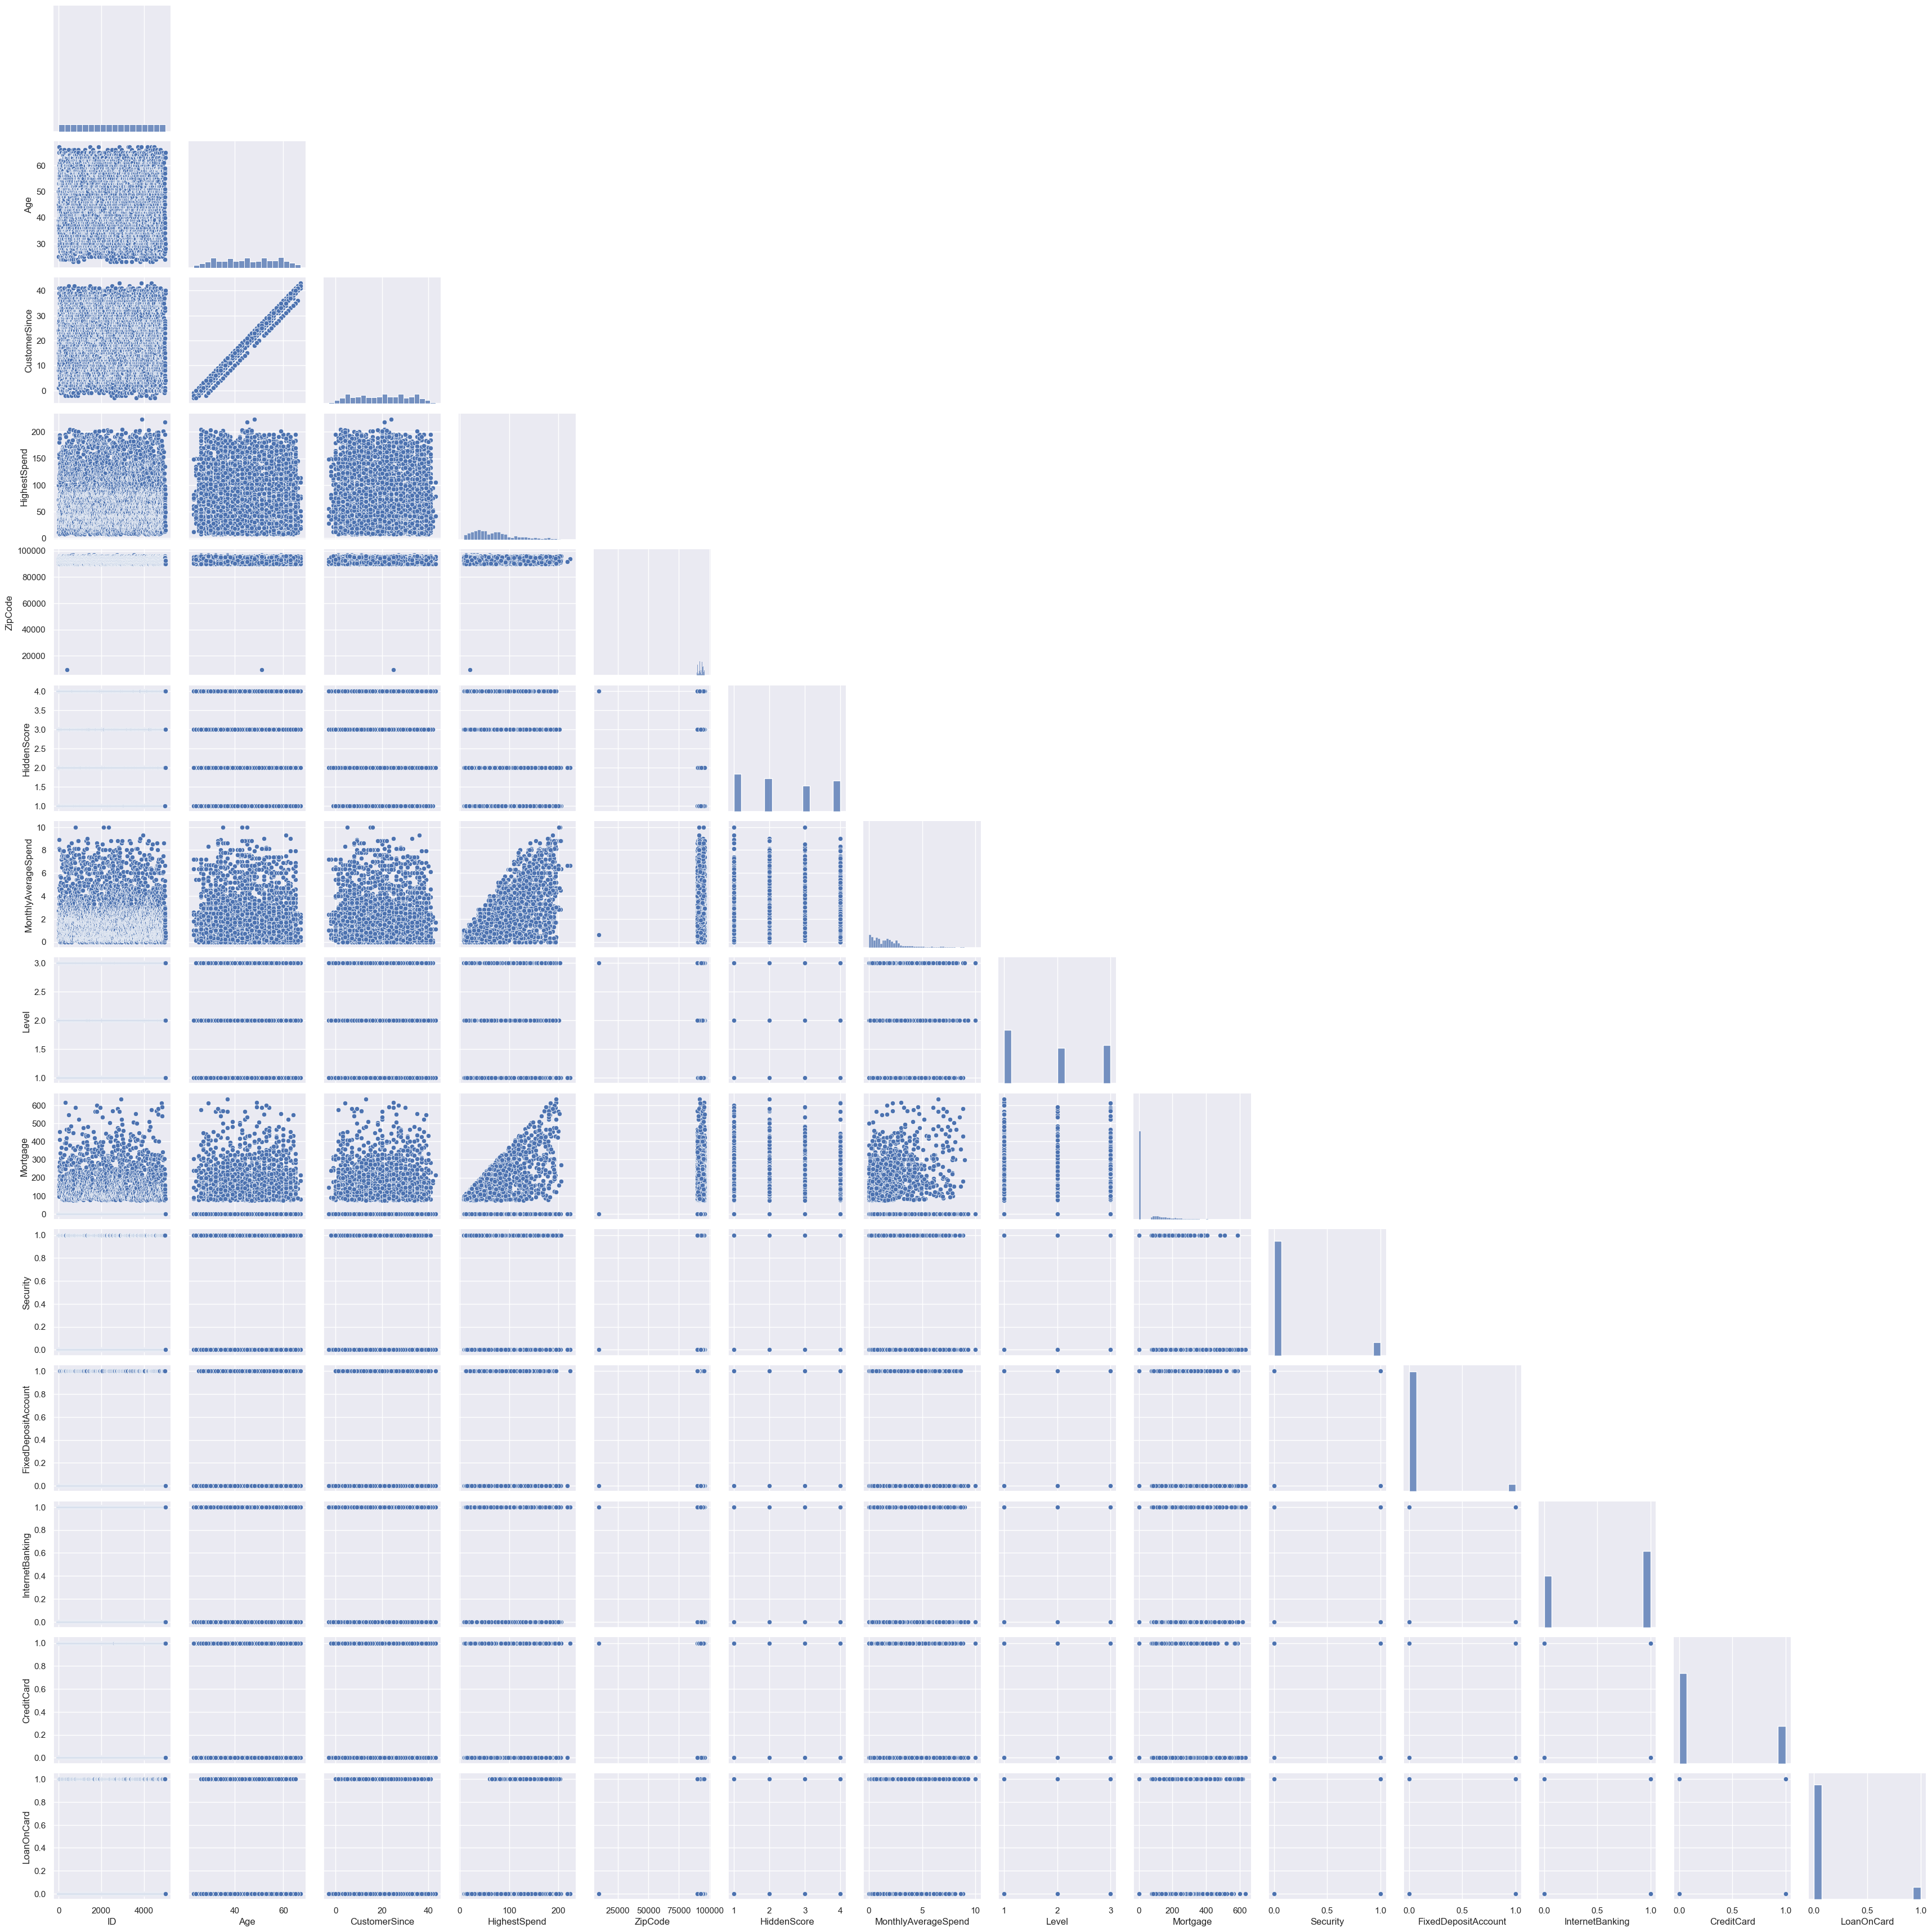

In [144]:
sns.pairplot(merged_df,corner=True)

A CORRELATED DATA DISTRIBUTION IN MATRICS VIEW

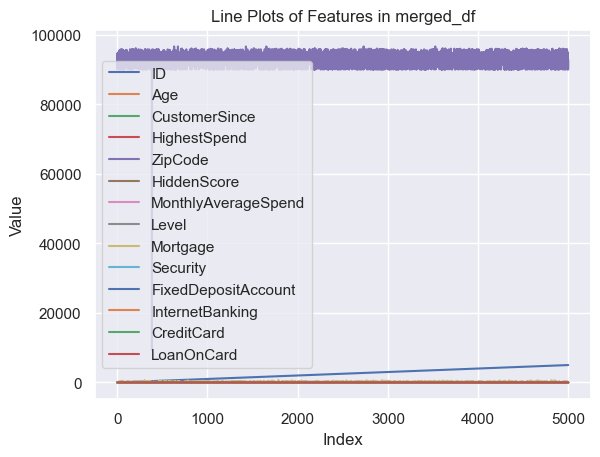

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical features (exclude 'Class' if categorical)
numerical_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
if 'Class' in numerical_cols:
    numerical_cols.remove('Class')  # Exclude 'Class' if present

# Create line plots
for col in numerical_cols:
    plt.plot(merged_df.index, merged_df[col], label=col) # plt.Plot is necessary for line plot here..plot only will not work

plt.xlabel("Index")  # Set x-axis label (consider using actual column names if applicable)
plt.ylabel("Value")  # Set y-axis label
plt.title("Line Plots of Features in merged_df")  # Set plot title
plt.legend()  # Add legend
plt.show()

In [146]:
merged_df.corr()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.027188
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.008147
CustomerSince,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007801
HighestSpend,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502626
ZipCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000120
HiddenScore,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061761
MonthlyAverageSpend,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366912
Level,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.137010
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.141947
Security,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021982


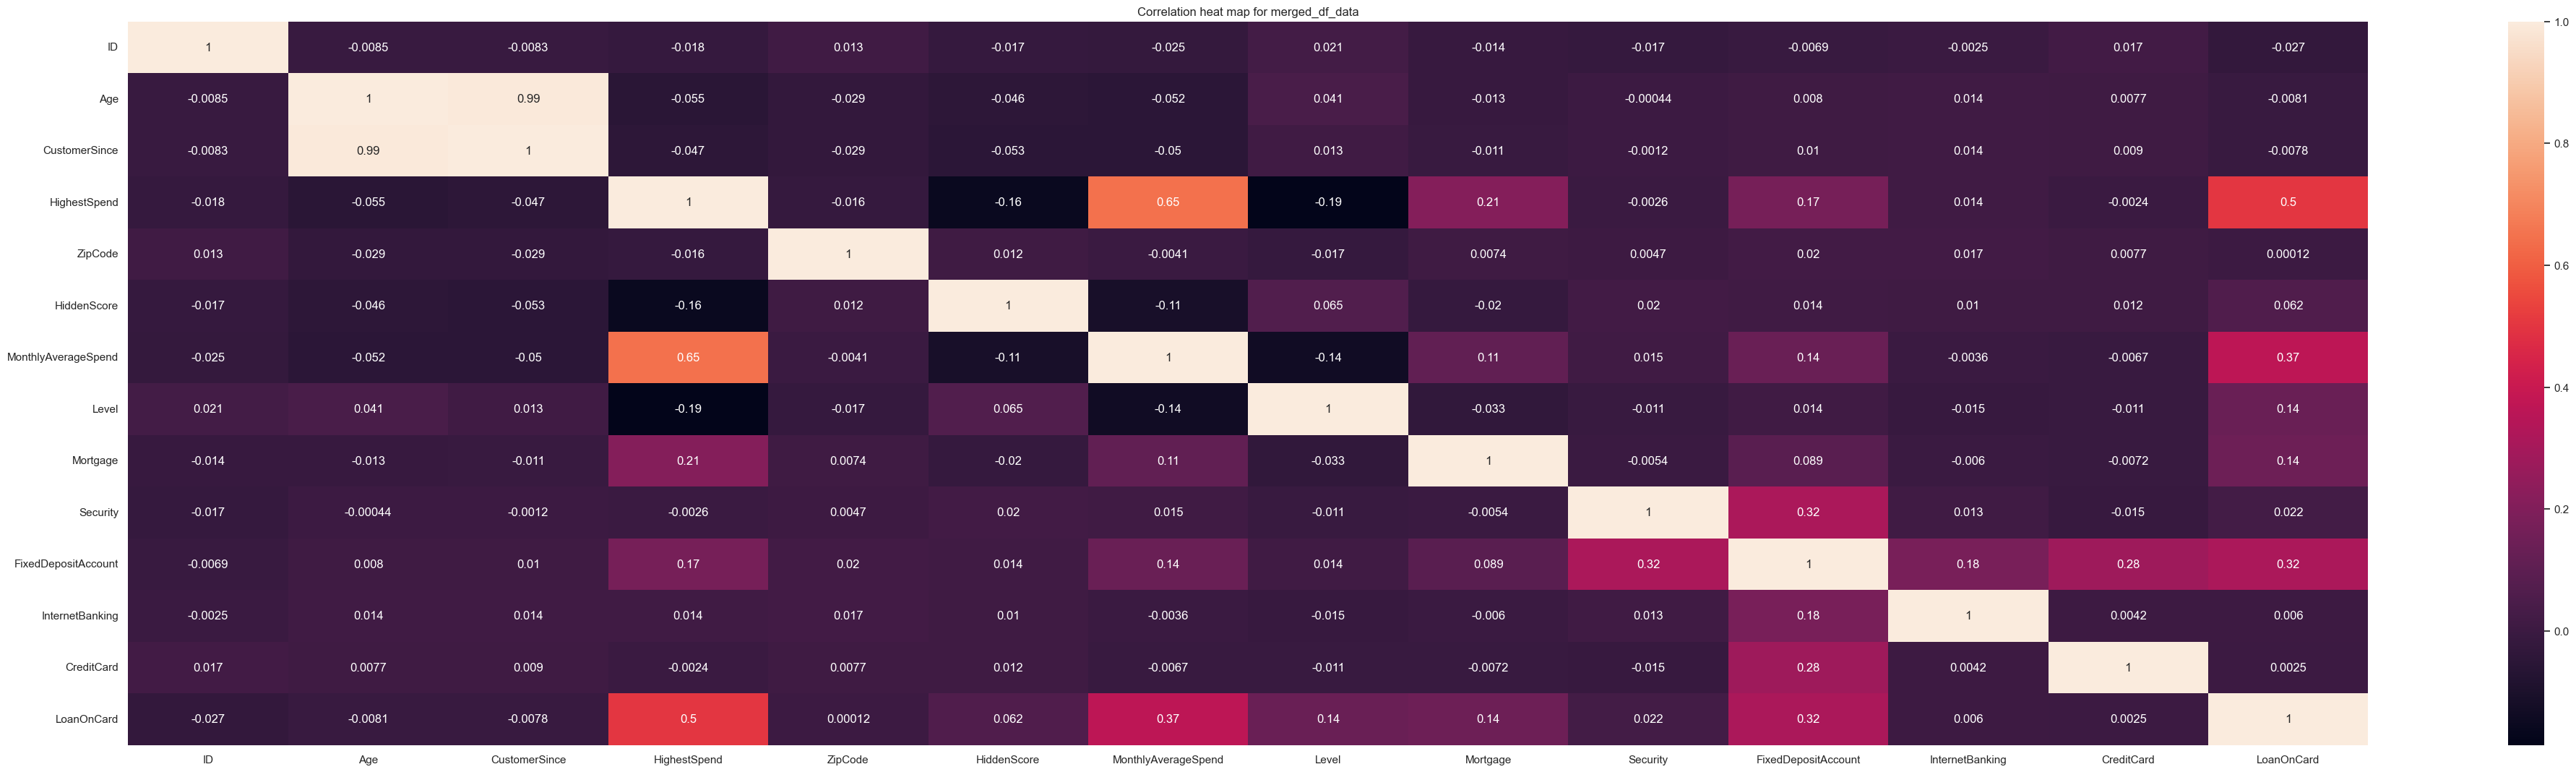

In [149]:
plt.figure(figsize=(50,13))
htmp = sns.heatmap(merged_df.corr(),annot=True)
htmp.set_title('Correlation heat map for merged_df_data')
plt.show()

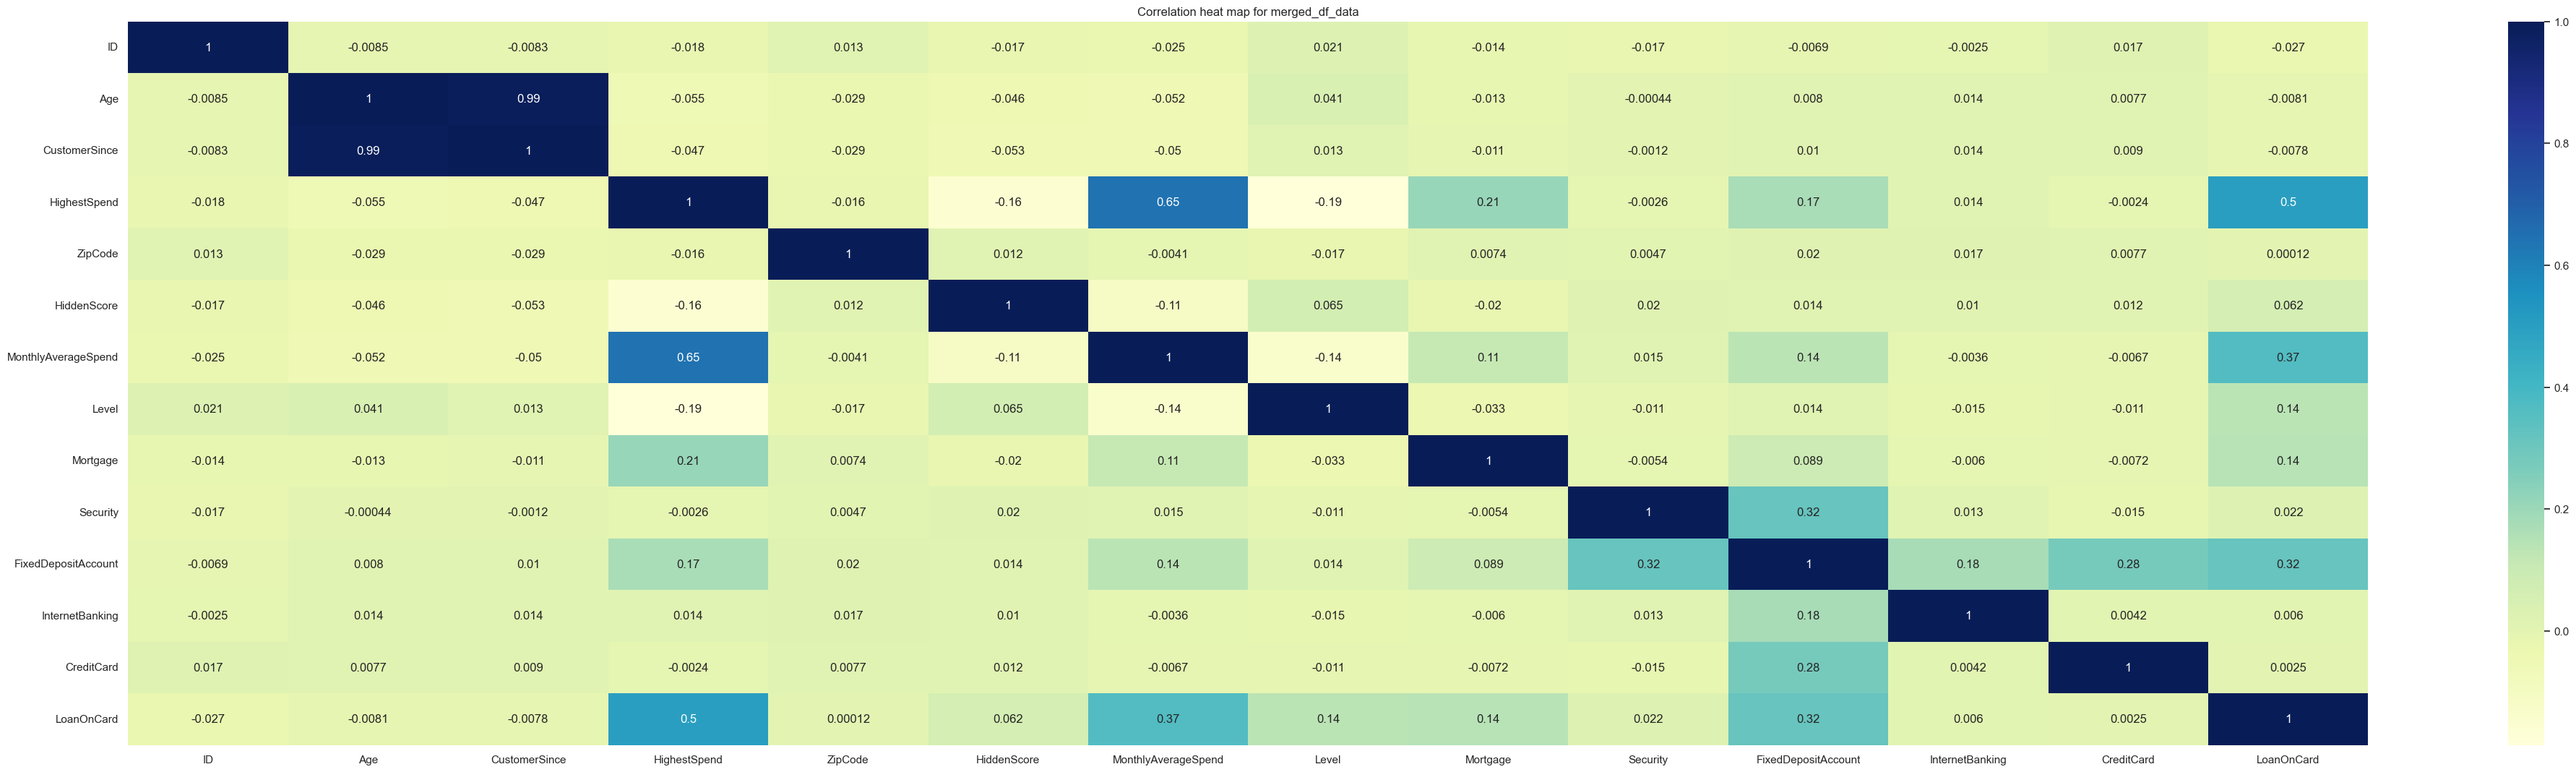

In [150]:
plt.figure(figsize=(50,13))
htmp = sns.heatmap(merged_df.corr(),annot=True,cmap='YlGnBu')
htmp.set_title('Correlation heat map for merged_df_data')
plt.show()

**Data pre-processing:**
* Segregate predictors vs target attributes
* Perform normalisation or scaling if required.
* Check for target balancing. Add your comments.
* Perform train-test split.

**Segregate predictors vs target attributes

In [157]:
target_variable = 'Level'
predictor_variables = merged_df.drop(target_variable, axis=1).columns

# Print the results
print(f"Target variable: {target_variable}")
print(f"Predictor variables: {', '.join(predictor_variables)}")

Target variable: Level
Predictor variables: ID, Age, CustomerSince, HighestSpend, ZipCode, HiddenScore, MonthlyAverageSpend, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard


**Perform normalisation or scaling if required.


In [160]:
df5=merged_df.copy()

In [162]:
X =  df5.drop(['Level'],axis=1)
Y = df5['Level']

In [163]:
from scipy.stats import zscore

In [164]:
X

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,1,0,0.0


In [165]:
Y

0       1
1       1
2       1
3       2
4       2
       ..
4995    3
4996    1
4997    3
4998    2
4999    1
Name: Level, Length: 5000, dtype: int64

In [166]:
XScaled = X.apply(zscore)

In [167]:
XScaled

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,NaN
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,NaN
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,NaN
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,NaN
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.728933,-1.425438,-1.491662,-0.733757,-0.214694,-1.216855,-0.021710,-0.555524,-0.341423,-0.25354,0.821951,-0.645314,NaN
4996,1.729626,-1.338194,-1.404454,-1.276892,-0.525774,1.397414,-0.880087,0.280238,-0.341423,-0.25354,0.821951,-0.645314,NaN
4997,1.730319,1.540880,1.647835,-1.081363,-0.061039,-0.345432,-0.937312,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,NaN
4998,1.731012,1.715370,1.735043,-0.538229,-1.469855,0.525991,-0.822862,-0.555524,-0.341423,-0.25354,0.821951,-0.645314,NaN


In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data 

array([[0.00000000e+00, 4.54545455e-02, 8.69565217e-02, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [2.00040008e-04, 5.00000000e-01, 4.78260870e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [4.00080016e-04, 3.63636364e-01, 3.91304348e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       ...,
       [9.99599920e-01, 9.09090909e-01, 9.13043478e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99799960e-01, 9.54545455e-01, 9.34782609e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.13636364e-01, 1.52173913e-01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [170]:
from sklearn.preprocessing import MaxAbsScaler

In [171]:
absscaler = MaxAbsScaler()
absscaler.fit(X)
abs_scaled_data = absscaler.transform(X)
abs_scaled_data

array([[2.00000000e-04, 3.73134328e-01, 2.32558140e-02, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [4.00000000e-04, 6.71641791e-01, 4.41860465e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [6.00000000e-04, 5.82089552e-01, 3.48837209e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       ...,
       [9.99600000e-01, 9.40298507e-01, 9.06976744e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99800000e-01, 9.70149254e-01, 9.30232558e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.17910448e-01, 9.30232558e-02, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [172]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()
robustscaler_scaled_data = robustscaler.fit_transform(X)
robustscaler_scaled_data

array([[-1.        , -1.        , -0.95      , ..., -1.        ,
         0.        ,         nan],
       [-0.99959992,  0.        , -0.05      , ..., -1.        ,
         0.        ,         nan],
       [-0.99919984, -0.3       , -0.25      , ..., -1.        ,
         0.        ,         nan],
       ...,
       [ 0.99919984,  0.9       ,  0.95      , ..., -1.        ,
         0.        ,  0.        ],
       [ 0.99959992,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.85      , -0.8       , ...,  0.        ,
         1.        ,  0.        ]])

**target balancing

In [158]:
class_counts = merged_df['Level'].value_counts()  # Count occurrences of each class label
print(class_counts)

1    2096
3    1501
2    1403
Name: Level, dtype: int64


**Perform train-test split

In [159]:
X = merged_df.drop(['Level'],axis=1)
y =merged_df['Level']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(merged_df.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5000, 14)
(3500, 13)
(3500,)
(1500, 13)
(1500,)


**Model training, testing and tuning:**
* Design and train a Logistic regression and Naive Bayes classifiers.
*	Display the classification accuracies for train and test data.
*	Display and explain the classification report in detail.
*	Apply all the possible tuning techniques to train the best model for the given data.
* Select the final best trained model with your comments for selecting this model.


In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer  # For imputation
from sklearn.metrics import accuracy_score  # Import for evaluation

# Assuming you have already merged your DataFrames and created 'merged_df'

# Split data using your provided settings
X = merged_df.drop(['Level'], axis=1)  # Features
y = merged_df['Level']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Handle missing values (using imputation)
imputer = SimpleImputer(strategy='mean')  # Choose an imputation strategy (e.g., mean, median)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Impute missing values in test set as well

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_imputed, y_train)

# Train Naive Bayes model (Gaussian Naive Bayes)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_imputed, y_train)

# Evaluate model performance (accuracy)
logistic_accuracy = accuracy_score(y_test, logistic_model.predict(X_test_imputed))
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_model.predict(X_test_imputed))

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)

# Make predictions on new data (optional)
# new_data = ... (your new data)
# Impute missing values in new_data using the fitted imputer
# new_data_imputed = imputer.transform(new_data)
# logistic_prediction = logistic_model.predict(new_data_imputed)
# naive_bayes_prediction = naive_bayes_model.predict(new_data_imputed)


Logistic Regression Accuracy: 0.43466666666666665
Naive Bayes Accuracy: 0.45266666666666666


In [206]:
# Generate classification report
report = classification_report(y_test, logistic_model.predict(X_test_imputed))
print(report)

              precision    recall  f1-score   support

           1       0.47      0.77      0.58       641
           2       0.35      0.08      0.13       415
           3       0.35      0.29      0.32       444

    accuracy                           0.43      1500
   macro avg       0.39      0.38      0.34      1500
weighted avg       0.40      0.43      0.38      1500



In [208]:
# Generate classification report
report = classification_report(y_test, naive_bayes_model.predict(X_test_imputed))
print(report)

              precision    recall  f1-score   support

           1       0.51      0.68      0.58       641
           2       0.36      0.39      0.37       415
           3       0.41      0.18      0.25       444

    accuracy                           0.45      1500
   macro avg       0.43      0.42      0.40      1500
weighted avg       0.44      0.45      0.43      1500




**it's difficult to definitively say which model is "good" based solely on the precision, recall, and F1-score values  (both models have the same scores: 0.58 F1-score).

Judging the best model solely based on precision, recall, and F1-score requires considering your specific problem context and the relative importance of these metrics.


Logistic Regression Accuracy: 0.43466666666666665
Naive Bayes Accuracy: 0.45266666666666666


both having similar accuracy.

based on specific false positive and false negative we can go with opt hyperparameter

In [ ]:
Tuning Techniques:

Hyperparameter Tuning:

Identify the hyperparameters of your chosen models (e.g., C, solver for Logistic Regression).
Use techniques like GridSearchCV or RandomizedSearchCV from scikit-learn to explore a range of hyperparameter values 
and identify the combination that leads to the best performance (usually based on metrics like accuracy, F1-score, or 
                                                                 a custom metric for your problem).
Feature Selection:

Analyze your features to identify irrelevant or redundant ones.
Techniques like feature importance scores (e.g., from Random Forest) or correlation analysis can help you select a subset
of features that contribute most to the model's performance. This can improve model performance and reduce training time.
Model Selection:

Try different machine learning algorithms (e.g., Logistic Regression, Naive Bayes, Support Vector Machines, Random Forest) 
on your data.
Use cross-validation techniques (e.g., Stratified K-Fold) to evaluate the performance of each model on unseen data and 
avoid overfitting. The model with the best average performance across folds is considered the best choice.
Regularization:

Techniques like L1 or L2 regularization can help prevent overfitting by penalizing models with high parameter complexity.
Tune the regularization parameter (e.g., C in Logistic Regression) to find a balance between reducing model complexity and
maintaining good performance.
Selecting the Best Model:

There's no single "best" model for all situations. The selection depends on various factors:

Problem Type: Classification, regression, clustering, etc.
Data Characteristics: Size, complexity, feature types.
Evaluation Metrics: Accuracy, F1-score, precision, recall, interpretability (for some models).
Computational Resources: Training time and memory requirements.
Here are some guidelines for selecting the final model:

Evaluate Performance: Consider the model with the highest average performance on unseen data based on your chosen metrics
(e.g., accuracy, F1-score).
Interpretability: If interpretability of the model's predictions is important, simpler models like Logistic Regression or 
Decision Trees might be preferred over black-box models like Random Forest.
Complexity vs. Performance: Consider the trade-off between model complexity and performance. A more complex model might 
have slightly better performance but may be prone to overfitting or require more computational resources.
Example (Logistic Regression and Random Forest):

Train Logistic Regression and Random Forest with GridSearchCV for hyperparameter tuning.
Use Stratified K-Fold cross-validation to evaluate both models.
Compare the average accuracy (or F1-score) across folds for each model.
If interpretability is not crucial, choose the model with the highest average performance.
If interpretability is important, consider Logistic Regression even if it has slightly lower performance compared to
Random Forest.